## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline

### Loading data

In [2]:
# !unzip MNIST_data.zip
# !ls

In [3]:
data = pd.read_csv('MNIST_data/train.csv')
X_test = pd.read_csv("MNIST_data/test.csv")

In [18]:
data.shape

(42000, 785)

In [4]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Extracting feature variables and target variable

In [5]:
data_y = data['label'].values
data_x = data.drop('label',axis=1)

In [6]:
data_x.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data visualization

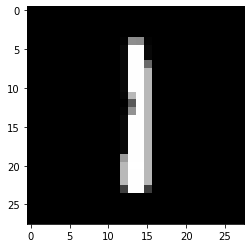

In [7]:
img = data_x.iloc[2].values.reshape((28,28))
plt.imshow(img,cmap='gray')

In [8]:
set(data_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [9]:
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size = 0.1, random_state=42)

### Model Building

In [10]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

# *Explanation* 

1. ‘sequential’, which means that the layers are set up one after the other in a singular sequence.
2.  input data’s size is 784, which means that 784 neurons are present in the input layer
3.  the output shape is defined as 128, which means that the hidden layer has 128 neurons.
4.  weight matrix will be of size 784 x 128, and there will be 128 elements in the bias vector, one for each neuron in the hidden layer
5. Total number of parameters  = Elements in weight matrix + elements in bias matrix 784 x 128 + 128
6. The first hidden layer has 128 neurons and the second hidden layer has 128 neurons, then the weight matrix is of size 128 x 128 and the bias vector is of size 128.
7. last dense layer is the output layer with 10 neurons (classes)

In [13]:
#‘sequential’, which means that the layers are set up one after the other in a singular sequence.

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


### Model training

In [21]:
X_train.shape[0]/64

590.625

In [22]:
model.fit(X_train, y_train, 
          batch_size=64,
          epochs=7,
          validation_data=(X_val, y_val))

Epoch 1/7
591/591 [==============================] - 2s 3ms/step - loss: 0.1318 - accuracy: 0.9645 - val_loss: 0.2333 - val_accuracy: 0.9464
Epoch 2/7
591/591 [==============================] - 2s 3ms/step - loss: 0.1243 - accuracy: 0.9659 - val_loss: 0.2615 - val_accuracy: 0.9440
Epoch 3/7
591/591 [==============================] - 2s 3ms/step - loss: 0.1081 - accuracy: 0.9695 - val_loss: 0.2307 - val_accuracy: 0.9479
Epoch 4/7
591/591 [==============================] - 2s 3ms/step - loss: 0.0883 - accuracy: 0.9745 - val_loss: 0.1630 - val_accuracy: 0.9600
Epoch 5/7
591/591 [==============================] - 2s 3ms/step - loss: 0.0786 - accuracy: 0.9771 - val_loss: 0.2013 - val_accuracy: 0.9543
Epoch 6/7
591/591 [==============================] - 2s 3ms/step - loss: 0.0908 - accuracy: 0.9737 - val_loss: 0.2055 - val_accuracy: 0.9538
Epoch 7/7
591/591 [==============================] - 2s 3ms/step - loss: 0.0708 - accuracy: 0.9794 - val_loss: 0.1906 - val_accuracy: 0.9540


# *Explanation* 

1. The text 591/591 indicates the number of batches the training step is running through. Since the batch size is 64 and the training data set is of size 37800 (90% of the total  dataset which is 42000) while the rest 10% is validation dataset, it will be separated into 591 batches (37800/64).

2. You can also see the amount of time it is taking for training a single batch, for example, 7ms/step.

3. The text snippets loss and val_loss show the sparse categorical cross-entropy loss (mentioned while compiling the model; refer to the previous segment for this).

4. The text snippets accuracy and val_accuracy show the proportion of matches between the predicted class and the actual class. This proportion is calculated on the whole training and validation data sets.

5. And, after 5 epochs (5 run-throughs of training the whole data set), we can see the validation accuracy reached is approximately 95%.

### Model evaluation

In [15]:
model.predict(X_test).argmax(axis=1)

array([2, 0, 8, ..., 3, 9, 2], dtype=int64)

# Test Data

The predicted label is: 0


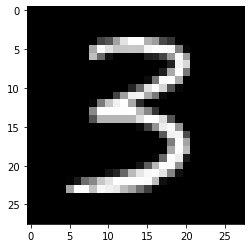

In [16]:
img = X_test.iloc[9].values.reshape((28,28))
plt.imshow(img,cmap='gray')
print("The predicted label is:" ,model.predict(X_test).argmax(axis=1)[1])

# Train Data

5
The predicted label is: 5


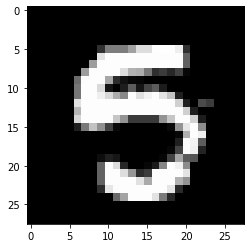

In [17]:
print(y_train[1])
img = X_train.iloc[1].values.reshape((28,28))
plt.imshow(img,cmap='gray')
print("The predicted label is:" ,model.predict(X_train).argmax(axis=1)[1])

Further ahead: You can try increasing the model layers and play with the hyperparameters to increase model's performance

# Dropout

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Dense(
            10, activation="relu",input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(
            10, activation="relu"
        ),
        keras.layers.Dense(
            5, activation="relu"
        ),
        keras.layers.Dense(1, activation="linear")
    ]
)

1. '0.2' is the probability of zeros and not ones. This is one of the hyperparameters to be experimented with when building a neural network.

2. You do not apply dropout to the output layer.
3. The mask used here is a matrix.

4. Dropout is applied only during training, not while testing.

5. e.g We can see that there are 4 connections dropped out from 12 connections in total. Since, the dropout hyperparameter ‘q’ is the probability of zeros, then q=4/12=0.333 approximately.

6. The mask matrix will have those elements set to zero whose indices correspond to those neurons between the two layers that have been crossed out, i.e., removed.

7. the weight matrix will have the dimensions (4,7), i.e., 4 rows and 7 columns. The shape of α will be (Number of columns, 1) or the dimension of α = (number of neurons in the previous layer 'l-1', 1).
